In [1]:
# !pip install imgsim
import pandas as pd
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import cv2
import imgsim
import cv2
import os
vtr = imgsim.Vectorizer()

def cos_sim(v1, v2):
    v1 = (v1 - np.mean(v1)) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    v2 = (v2 - np.mean(v2)) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return np.dot(v1, v2)

# ====================================================
# DATA
# ====================================================
df = pd.read_csv('/home/yamanaka/Estimate_KIc_with_ViT/Mototake_Analysis/VGG+GP/inout_data.csv', header=None, names=['Id', 'KIc'])
df['file_path'] = ['/home/yamanaka/Estimate_KIc_with_ViT/Mototake_Analysis/VGG+GP/imagedata/' + str(i) + '.jpg' for i in df['Id']]

## vit
vit_oof = pd.read_csv('../KIc/Model/vit/vit_large_patch32_224_Kfold_seed42_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
true_kic_vit = vit_oof['KIc']   

# 区切りの幅を計算
num_bins = 9
bin_width = (np.max(true_kic_vit) - np.min(true_kic_vit)) / num_bins

# middleのidを取得
vit_middle_id = pd.Series([])

for i in range(num_bins):
    bin_lower = np.min(true_kic_vit) + i * bin_width
    bin_upper = bin_lower + bin_width
    bin_mask = (true_kic_vit >= bin_lower) & (true_kic_vit < bin_upper)
    if i == 0:
        low_id_list = vit_oof[bin_mask]['Id']
    elif i == (num_bins - 1):
        high_id_list = vit_oof[bin_mask]['Id']
    else:
        middle_id_list = pd.concat([vit_middle_id, vit_oof[bin_mask]['Id']])

# --------------------------------------------------------------------------------
# define the function to calculate the symmetric similarity in high KIc
# --------------------------------------------------------------------------------
high_dist_ar = np.zeros(len(high_id_list))
high_cos_ar = np.zeros(len(high_id_list))

for idx, high_id in enumerate(high_id_list):
    print('id : ', idx)
    image_path = '/home/yamanaka/Estimate_KIc_with_ViT/Mototake_Analysis/VGG+GP/imagedata/' + str(high_id) + '.jpg'
    img0 = cv2.imread(image_path)

    img1 = img0[:int(img0.shape[0]/2), :]
    # plt.imshow(img1)
    # plt.show()
    img2 = img0[int(img0.shape[0]/2):, :][::-1] if img0.shape[0] % 2 == 0 else img0[int(img0.shape[0]/2):img0.shape[0]-1, :][::-1]
    # plt.imshow(img2)
    # plt.show()

    vec1 = vtr.vectorize(img1)
    vec2 = vtr.vectorize(img2)

    dist = imgsim.distance(vec1, vec2)
    high_dist_ar[idx] = dist

    img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    img1 = img1.flatten()
    img2 = img2.flatten()
    high_cos_ar[idx] = cos_sim(img1,img2)
    print("distance =", dist)
    print("distance =", cos_sim(img1,img2))


# --------------------------------------------------------------------------------
# define the function to calculate the symmetric similarity in low KIc
# --------------------------------------------------------------------------------
low_dist_ar = np.zeros(len(low_id_list))
low_cos_ar = np.zeros(len(low_id_list))

for idx, low_id in enumerate(low_id_list):
    print('id : ', idx)
    image_path = '/home/yamanaka/Estimate_KIc_with_ViT/Mototake_Analysis/VGG+GP/imagedata/' + str(low_id) + '.jpg'
    img0 = cv2.imread(image_path)
        
    img1 = img0[:int(img0.shape[0]/2), :]
    # plt.imshow(img1)
    # plt.show()
    img2 = img0[int(img0.shape[0]/2):, :][::-1] if img0.shape[0] % 2 == 0 else img0[int(img0.shape[0]/2):img0.shape[0]-1, :][::-1]
    # plt.imshow(img2)
    # plt.show()

    vec1 = vtr.vectorize(img1)
    vec2 = vtr.vectorize(img2)

    dist = imgsim.distance(vec1, vec2)
    low_dist_ar[idx] = dist
    
    img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    img1 = img1.flatten()
    img2 = img2.flatten()
    low_cos_ar[idx] = cos_sim(img1,img2)
    print("distance =", dist)
    print("distance =", cos_sim(img1,img2))


# --------------------------------------------------------------------------------
# define the function to calculate the symmetric similarity in not middle KIc
# --------------------------------------------------------------------------------
middle_dist_ar = np.zeros(len(middle_id_list))
middle_cos_ar = np.zeros(len(middle_id_list))

for idx, middle_id in enumerate(middle_id_list):
    print('id : ', idx)
    image_path = '/home/yamanaka/Estimate_KIc_with_ViT/Mototake_Analysis/VGG+GP/imagedata/' + str(middle_id) + '.jpg'
    img0 = cv2.imread(image_path)
    
    img1 = img0[:int(img0.shape[0]/2), :]
    # plt.imshow(img1)
    # plt.show()
    img2 = img0[int(img0.shape[0]/2):, :] if img0.shape[0] % 2 == 0 else img0[int(img0.shape[0]/2):img0.shape[0]-1, :]
    # plt.imshow(img2)
    # plt.show()

    vec1 = vtr.vectorize(img1)
    vec2 = vtr.vectorize(img2)

    dist = imgsim.distance(vec1, vec2)
    middle_dist_ar[idx] = dist
    
    img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    img1 = img1.flatten()
    img2 = img2.flatten()
    middle_cos_ar[idx] = cos_sim(img1,img2)
    print("distance =", dist)
    print("distance =", cos_sim(img1,img2))


/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_1559856/398489871.py:45: FutureW

id :  0
distance = 12.377168
distance = 0.1577690488738784
id :  1
distance = 8.539876
distance = 0.1375428110289659
id :  2
distance = 16.519367
distance = 0.03242638098291237
id :  3
distance = 17.461536
distance = 0.1556911441863954
id :  4
distance = 13.028767
distance = 0.1696892235863389
id :  5
distance = 9.15174
distance = 0.1999066035660532
id :  6
distance = 6.6048455
distance = 0.16666742226594666
id :  7
distance = 11.922037
distance = 0.12985781083846562
id :  8
distance = 7.187252
distance = 0.1951446325829272
id :  9
distance = 9.881495
distance = 0.19657823292874407
id :  10
distance = 9.615027
distance = 0.13657093680116
id :  11
distance = 12.664953
distance = 0.16521309598558437
id :  12
distance = 16.691242
distance = 0.17361510317632567
id :  13
distance = 12.0298815
distance = 0.1338448853775005
id :  14
distance = 11.518123
distance = 0.1795193762241259
id :  15
distance = 12.668536
distance = 0.17815822431664483
id :  16
distance = 9.469332
distance = 0.18645687

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


p01_value = 2.523416214510704e-05


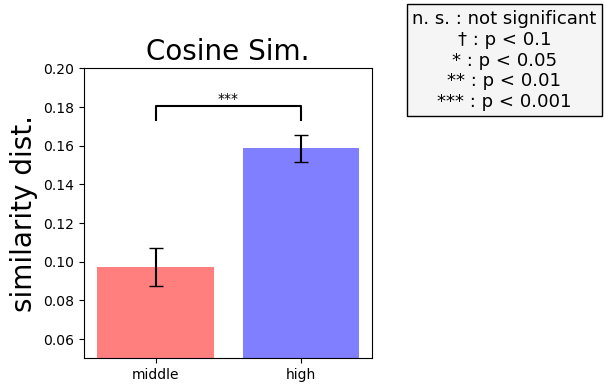

In [2]:
def barplot_annotate_brackets(num1, num2, data, center, 
                              height, yerr=None, dh=.05, 
                              barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.
  
    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """
  
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # ↓↓↓↓↓↓↓↓↓↓↓
        # * is p < 0.05
        # ** is p < 0.01
        # *** is p < 0.001
        # etc.
        text = ''
        p = .05

        if data >= 0.1:
            text = 'n. s.'
        elif data < 0.1 and data >= 0.05:
            text = '†'
        elif data < 0.05 and data >= 0.01:
            text = '*'
        elif data < 0.01 and data >= 0.001:
            text = '**'
        elif data < 0.001:
            text = '***'
        
  
    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]
  
    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]
  
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
  
    y = max(ly, ry) + dh
  
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
  
    plt.plot(barx, bary, c='black')
  
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
  
    plt.text(*mid, text, **kwargs)
    
    #ボックス作成
    pos = plt.gca().get_position()
    s_text = "n. s. : not significant\n† : p < 0.1\n* : p < 0.05\n** : p < 0.01\n*** : p < 0.001"
    dic_box = {
        'facecolor' : 'whitesmoke',
        'edgecolor' : 'black',
        'linewidth' : 1
    }

    #文字とボックスの挿入
    plt.text(pos.x1+1.5, pos.y1-.7, s=s_text, 
            color='black', ha='center', fontsize='13', 
            bbox=dic_box)
   
""" main """
n = 30
# Generate toy data
x0 = middle_cos_ar
x1 = high_cos_ar
 
# Welch’s t-test       
t01_value, p01_value = stats.ttest_ind(x0,x1,alternative='less')
print("p01_value =", p01_value)
""" plot """
heights = [np.mean(x0), np.mean(x1)]
std = [np.std(x0)/np.sqrt(n), np.std(x1)/np.sqrt(n)]
label = ["middle", "high"]
width = 0.8 # the width of the bars
bars = np.arange(len(heights))
colors = ["red", "blue"]
  
plt.figure(figsize=(7, 4))
plt.bar(bars, heights, width, tick_label=label, yerr=std, color=colors,
        align='center', alpha=0.5, ecolor='black', capsize=5)
plt.ylim(0.05,.20)
barplot_annotate_brackets(0, 1, p01_value, bars,
                          heights, yerr=std)
plt.tight_layout()
plt.ylabel("similarity dist.",fontsize=20)
plt.title("Cosine Sim.",fontsize=20)
plt.savefig("../Figure/cossim.eps")

plt.show()

TtestResult(statistic=0.013414200029545563, pvalue=0.4946667188679904, df=74.0)


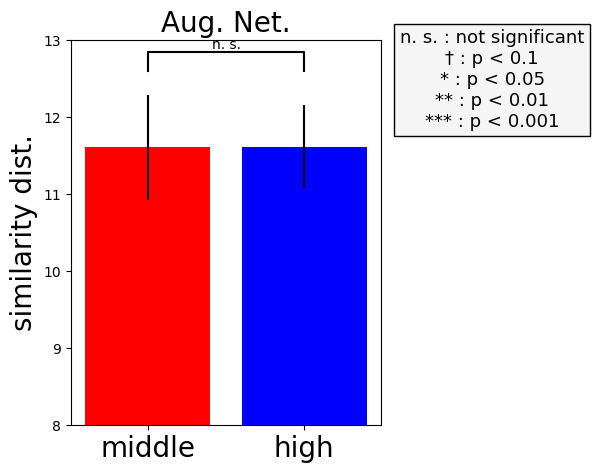

In [7]:
def barplot_annotate_brackets(num1, num2, data, center, 
                              height, yerr=None, dh=.05, 
                              barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.
  
    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """
  
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # ↓↓↓↓↓↓↓↓↓↓↓
        # * is p < 0.05
        # ** is p < 0.01
        # *** is p < 0.001
        # etc.
        text = ''
        p = .05

        if data >= 0.1:
            text = 'n. s.'
        elif data < 0.1 and data >= 0.05:
            text = '†'
        elif data < 0.05 and data >= 0.01:
            text = '*'
        elif data < 0.01 and data >= 0.001:
            text = '**'
        elif data < 0.001:
            text = '***'
        
  
    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]
  
    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]
  
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
  
    y = max(ly, ry) + dh
  
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
  
    plt.plot(barx, bary, c='black')
  
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
  
    plt.text(*mid, text, **kwargs)
    
    #ボックス作成
    pos = plt.gca().get_position()
    s_text = "n. s. : not significant\n† : p < 0.1\n* : p < 0.05\n** : p < 0.01\n*** : p < 0.001"
    dic_box = {
        'facecolor' : 'whitesmoke',
        'edgecolor' : 'black',
        'linewidth' : 1
    }

    #文字とボックスの挿入
    plt.text(pos.x1+1.3, pos.y1+11, s=s_text, 
            color='black', ha='center', fontsize='13', 
            bbox=dic_box)

n=20
x0 = high_dist_ar
x1 = middle_dist_ar

# Welch’s t-test       
t01_value, p01_value = stats.ttest_ind(x0,x1,alternative='less') 
 
""" plot """
heights = [np.mean(x0), np.mean(x1)]
std = [np.std(x0)/np.sqrt(len(x0)), np.std(x1)/np.sqrt(len(x1))]
label = ["middle", "high"]
width = 0.8 # the width of the bars
bars = np.arange(len(heights))
colors = ["red", "blue"]

plt.figure(figsize=(4, 5))
plt.bar([0], [np.mean(x0)],yerr=np.std(x0)/np.sqrt(n),color="red")
plt.bar([1], [np.mean(x1)],yerr=np.std(x1)/np.sqrt(n),color="blue")
plt.ylim(8,13)
plt.xticks([0,1],["middle", "high"],fontsize=20)
plt.ylabel("similarity dist.",fontsize=20)
plt.title("Aug. Net.",fontsize=20)

barplot_annotate_brackets(0, 1, p01_value, bars,
                          heights, yerr=std)

plt.savefig("../Figure/augnet.eps")

test1 = stats.ttest_ind(x1,x0,alternative='greater')
print(test1)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


p01_value = 1.4395568792375447e-09


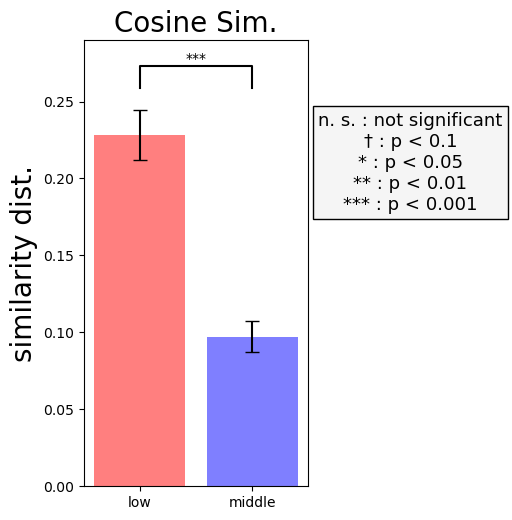

In [5]:
def barplot_annotate_brackets(num1, num2, data, center, 
                              height, yerr=None, dh=.05, 
                              barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.
  
    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """
  
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # ↓↓↓↓↓↓↓↓↓↓↓
        # * is p < 0.05
        # ** is p < 0.01
        # *** is p < 0.001
        # etc.
        text = ''
        p = .05

        if data >= 0.1:
            text = 'n. s.'
        elif data < 0.1 and data >= 0.05:
            text = '†'
        elif data < 0.05 and data >= 0.01:
            text = '*'
        elif data < 0.01 and data >= 0.001:
            text = '**'
        elif data < 0.001:
            text = '***'
        
  
    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]
  
    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]
  
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
  
    y = max(ly, ry) + dh
  
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
  
    plt.plot(barx, bary, c='black')
  
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
  
    plt.text(*mid, text, **kwargs)
    
    #ボックス作成
    pos = plt.gca().get_position()
    s_text = "n. s. : not significant\n† : p < 0.1\n* : p < 0.05\n** : p < 0.01\n*** : p < 0.001"
    dic_box = {
        'facecolor' : 'whitesmoke',
        'edgecolor' : 'black',
        'linewidth' : 1
    }

    #文字とボックスの挿入
    plt.text(pos.x1+1.5, pos.y1-.7, s=s_text, 
            color='black', ha='center', fontsize='13', 
            bbox=dic_box)
   
""" main """
n = 30
# Generate toy data
x0 = low_cos_ar
x1 = middle_cos_ar
 
# Welch’s t-test       
t01_value, p01_value = stats.ttest_ind(x0,x1,alternative='greater')
print("p01_value =", p01_value)
""" plot """
heights = [np.mean(x0), np.mean(x1)]
std = [np.std(x0)/np.sqrt(n), np.std(x1)/np.sqrt(n)]
label = ["low", "middle"]
width = 0.8 # the width of the bars
bars = np.arange(len(heights))
colors = ["red", "blue"]
  
plt.figure(figsize=(6, 5))
plt.bar(bars, heights, width, tick_label=label, yerr=std, color=colors,
        align='center', alpha=0.5, ecolor='black', capsize=5)
plt.ylim(0.,.29)
barplot_annotate_brackets(0, 1, p01_value, bars,
                          heights, yerr=std)
plt.tight_layout()
plt.ylabel("similarity dist.",fontsize=20)
plt.title("Cosine Sim.",fontsize=20)
plt.savefig("../Figure/cossim.eps")

plt.show()

TtestResult(statistic=1.1470799186517375, pvalue=0.12899928417466663, df=41.0)


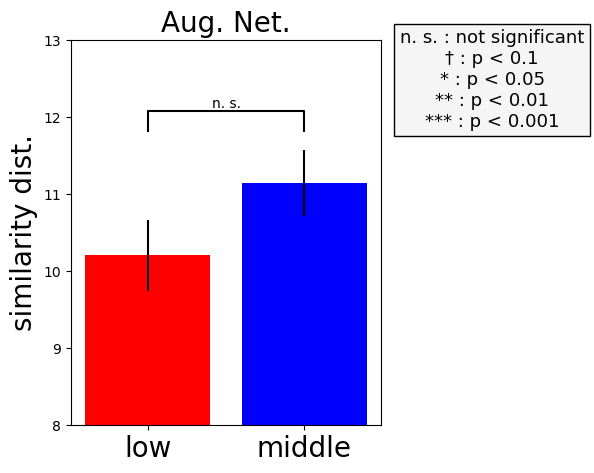

In [6]:
def barplot_annotate_brackets(num1, num2, data, center, 
                              height, yerr=None, dh=.05, 
                              barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.
  
    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """
  
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # ↓↓↓↓↓↓↓↓↓↓↓
        # * is p < 0.05
        # ** is p < 0.01
        # *** is p < 0.001
        # etc.
        text = ''
        p = .05

        if data >= 0.1:
            text = 'n. s.'
        elif data < 0.1 and data >= 0.05:
            text = '†'
        elif data < 0.05 and data >= 0.01:
            text = '*'
        elif data < 0.01 and data >= 0.001:
            text = '**'
        elif data < 0.001:
            text = '***'
        
  
    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]
  
    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]
  
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
  
    y = max(ly, ry) + dh
  
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
  
    plt.plot(barx, bary, c='black')
  
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
  
    plt.text(*mid, text, **kwargs)
    
    #ボックス作成
    pos = plt.gca().get_position()
    s_text = "n. s. : not significant\n† : p < 0.1\n* : p < 0.05\n** : p < 0.01\n*** : p < 0.001"
    dic_box = {
        'facecolor' : 'whitesmoke',
        'edgecolor' : 'black',
        'linewidth' : 1
    }

    #文字とボックスの挿入
    plt.text(pos.x1+1.3, pos.y1+11, s=s_text, 
            color='black', ha='center', fontsize='13', 
            bbox=dic_box)

n=30
x0 = low_dist_ar
x1 = middle_dist_ar[:n]

# Welch’s t-test       
t01_value, p01_value = stats.ttest_ind(x0,x1,alternative='less') 
 
""" plot """
heights = [np.mean(x0), np.mean(x1)]
std = [np.std(x0)/np.sqrt(n), np.std(x1)/np.sqrt(n)]
label = ["low", "middle"]
width = 0.8 # the width of the bars
bars = np.arange(len(heights))
colors = ["red", "blue"]

plt.figure(figsize=(4, 5))
plt.bar([0], [np.mean(x0)],yerr=np.std(x0)/np.sqrt(n),color="red")
plt.bar([1], [np.mean(x1)],yerr=np.std(x1)/np.sqrt(n),color="blue")
plt.ylim(8,13)
plt.xticks([0,1],["low","middle"],fontsize=20)
plt.ylabel("similarity dist.",fontsize=20)
plt.title("Aug. Net.",fontsize=20)

barplot_annotate_brackets(0, 1, p01_value, bars,
                          heights, yerr=std)

plt.savefig("../Figure/augnet.eps")

test1 = stats.ttest_ind(x1,x0,alternative='greater')
print(test1)


In [ ]:
import os
import numpy as np
import cv2
import imgsim
import matplotlib.pyplot as plt
vtr = imgsim.Vectorizer()

# data
DIR_triangle1 =  "./data/triangle1_small.jpg"

# CFG
num_blur = 50
same_triangle_dist_ar = np.zeros((1, num_blur))

# main
for idx in range(1):
    print('id : ', idx)
    img = cv2.imread(DIR_triangle1)
    img1 = img
    # plt.imshow(img1)
    # plt.show()
    img2 = img
    # plt.imshow(img2)
    # plt.show()

    vec1 = vtr.vectorize(img1)
    vec2 = vtr.vectorize(img2)

    dist = imgsim.distance(vec1, vec2)

    same_triangle_dist_ar[idx][0] = dist

    # print("distance =", dist)
    
    for count in range(1, num_blur):
        img1 = cv2.blur(img1, (4+count, 4+count))
        # plt.imshow(img1)
        # plt.show()

        img2 = cv2.blur(img2, (4+count, 4+count))
        # plt.imshow(img2)
        # plt.show()

        vec1 = vtr.vectorize(img1)
        vec2 = vtr.vectorize(img2)

        dist = imgsim.distance(vec1, vec2)
    
        same_triangle_dist_ar[idx][count] = dist
        
        # print("distance =", dist)

/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yamanaka/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


id :  0


In [ ]:
import os
import numpy as np
import cv2
import imgsim
import matplotlib.pyplot as plt
vtr = imgsim.Vectorizer()

# data
DIR_triangle1 =  "./data/triangle1_small.jpg"
DIR_triangle2 =  "./data/triangle2_small.jpg"

# CFG
num_blur = 50
different_triangle_dist_ar = np.zeros((1, num_blur))

# main
for idx in range(1):
    print('id : ', idx)
    img1 = cv2.imread(DIR_triangle1)
    # plt.imshow(img1)
    # plt.show()
    img2 = cv2.imread(DIR_triangle2)
    # plt.imshow(img2)
    # plt.show()

    vec1 = vtr.vectorize(img1)
    vec2 = vtr.vectorize(img2)

    dist = imgsim.distance(vec1, vec2)

    different_triangle_dist_ar[idx][0] = dist

    # print("distance =", dist)
    
    for count in range(1, num_blur):
        img1 = cv2.blur(img1, (4+count, 4+count))
        # plt.imshow(img1)
        # plt.show()

        img2 = cv2.blur(img2, (4+count, 4+count))
        # plt.imshow(img2)
        # plt.show()

        vec1 = vtr.vectorize(img1)
        vec2 = vtr.vectorize(img2)

        dist = imgsim.distance(vec1, vec2)
    
        different_triangle_dist_ar[idx][count] = dist
        
        # print("distance =", dist)

id :  0


In [ ]:
# ====================================================
# DATA
# ====================================================
df = pd.read_csv('/home/yamanaka/Estimate_KIc_with_ViT/Mototake_Analysis/VGG+GP/inout_data.csv', header=None, names=['Id', 'KIc'])
df['file_path'] = ['/home/yamanaka/Estimate_KIc_with_ViT/Mototake_Analysis/VGG+GP/imagedata/' + str(i) + '.jpg' for i in df['Id']]

## vit
vit_oof = pd.read_csv('../KIc/Model/vit/vit_large_patch32_224_Kfold_seed42_oof_df.csv').sort_values(by='Id').reset_index(drop=True)
true_kic_vit = vit_oof['KIc']   

# 区切りの幅を計算
num_bins = 9
bin_width = (np.max(true_kic_vit) - np.min(true_kic_vit)) / num_bins

# middleのidを取得
vit_middle_id = pd.Series([])

for i in range(num_bins):
    bin_lower = np.min(true_kic_vit) + i * bin_width
    bin_upper = bin_lower + bin_width
    bin_mask = (true_kic_vit >= bin_lower) & (true_kic_vit < bin_upper)
    if i == 0:
        vit_low_id = vit_oof[bin_mask]['Id']
    elif i == (num_bins - 1):
        vit_high_id = vit_oof[bin_mask]['Id']
    else:
        vit_middle_id = pd.concat([vit_middle_id, vit_oof[bin_mask]['Id']])

# ====================================================
# SYMMETRIC
# ====================================================
num_blur = 50
high_dist_ar = np.zeros((len(vit_high_id), num_blur))
low_dist_ar = np.zeros((len(vit_low_id), num_blur))
middle_dist_ar = np.zeros((len(vit_middle_id), num_blur))

for high_idx, high_id in enumerate(vit_high_id):
    print('id : ', high_idx)
    image_path = '../KIc/Image_Original/1' + str(high_id).zfill(5) + '.jpg'
    img0 = cv2.imread(image_path)
    img1 = img0[55:240,120:540]
    # plt.imshow(img1)
    # plt.show()
    img2 = img0[240:430,120:540][::-1]
    # plt.imshow(img2)
    # plt.show()

    vec1 = vtr.vectorize(img1)
    vec2 = vtr.vectorize(img2)

    dist = imgsim.distance(vec1, vec2)

    high_dist_ar[high_idx][0] = dist

    # print("distance =", dist)
    
    for count in range(1, num_blur):
        img1 = cv2.blur(img1, (5, 5))
        # plt.imshow(img1)
        # plt.show()

        img2 = cv2.blur(img2, (5, 5))
        # plt.imshow(img2)
        # plt.show()

        vec1 = vtr.vectorize(img1)
        vec2 = vtr.vectorize(img2)

        dist = imgsim.distance(vec1, vec2)
    
        high_dist_ar[high_idx][count] = dist
        
        # print("distance =", dist)

for low_idx, low_id in enumerate(vit_low_id):
    print('id : ', low_idx)
    image_path = '../KIc/Image_Original/1' + str(low_id).zfill(5) + '.jpg'
    img0 = cv2.imread(image_path)
    img1 = img0[55:240,120:540]
    # plt.imshow(img1)
    # plt.show()
    img2 = img0[240:430,120:540][::-1]
    # plt.imshow(img2)
    # plt.show()

    vec1 = vtr.vectorize(img1)
    vec2 = vtr.vectorize(img2)

    dist = imgsim.distance(vec1, vec2)

    low_dist_ar[low_idx][0] = dist

    # print("distance =", dist)
    
    for count in range(1, num_blur):
        img1 = cv2.blur(img1, (5, 5))
        # plt.imshow(img1)
        # plt.show()

        img2 = cv2.blur(img2, (5, 5))
        # plt.imshow(img2)
        # plt.show()

        vec1 = vtr.vectorize(img1)
        vec2 = vtr.vectorize(img2)

        dist = imgsim.distance(vec1, vec2)
    
        low_dist_ar[low_idx][count] = dist
        
        # print("distance =", dist)

for middle_idx, middle_id in enumerate(vit_middle_id):
    print('id : ', middle_idx)
    image_path = '../KIc/Image_Original/1' + str(middle_id).zfill(5) + '.jpg'
    img0 = cv2.imread(image_path)
    img1 = img0[55:240,120:540]
    # plt.imshow(img1)
    # plt.show()
    img2 = img0[240:430,120:540][::-1]
    # plt.imshow(img2)
    # plt.show()

    vec1 = vtr.vectorize(img1)
    vec2 = vtr.vectorize(img2)

    dist = imgsim.distance(vec1, vec2)

    middle_dist_ar[middle_idx][0] = dist

    # print("distance =", dist)
    
    for count in range(1, num_blur):
        img1 = cv2.blur(img1, (5, 5))
        # plt.imshow(img1)
        # plt.show()

        img2 = cv2.blur(img2, (5, 5))
        # plt.imshow(img2)
        # plt.show()

        vec1 = vtr.vectorize(img1)
        vec2 = vtr.vectorize(img2)

        dist = imgsim.distance(vec1, vec2)
    
        middle_dist_ar[middle_idx][count] = dist
        
        # print("distance =", dist)

/tmp/ipykernel_1452378/1645100804.py:27: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  vit_middle_id = pd.concat([vit_middle_id, vit_oof[bin_mask]['Id'][:10]])


id :  0
id :  1
id :  2
id :  3
id :  4
id :  5
id :  6
id :  7
id :  8
id :  9
id :  0
id :  1
id :  2
id :  3
id :  4
id :  5
id :  6
id :  7
id :  8
id :  9
id :  0
id :  1
id :  2
id :  3
id :  4
id :  5
id :  6
id :  7
id :  8
id :  9
id :  10
id :  11
id :  12
id :  13
id :  14
id :  15
id :  16
id :  17
id :  18
id :  19
id :  20
id :  21
id :  22
id :  23
id :  24
id :  25
id :  26
id :  27
id :  28
id :  29
id :  30
id :  31
id :  32
id :  33
id :  34
id :  35
id :  36
id :  37
id :  38
id :  39
id :  40
id :  41
id :  42
id :  43
id :  44
id :  45
id :  46
id :  47
id :  48
id :  49
id :  50
id :  51
id :  52
id :  53
id :  54
id :  55
id :  56
id :  57
id :  58
id :  59
id :  60
id :  61
id :  62
id :  63
id :  64
id :  65
id :  66
id :  67
id :  68
id :  69
id :  70
id :  71
id :  72
id :  73
id :  74
id :  75
id :  76
id :  77
id :  78
id :  79


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


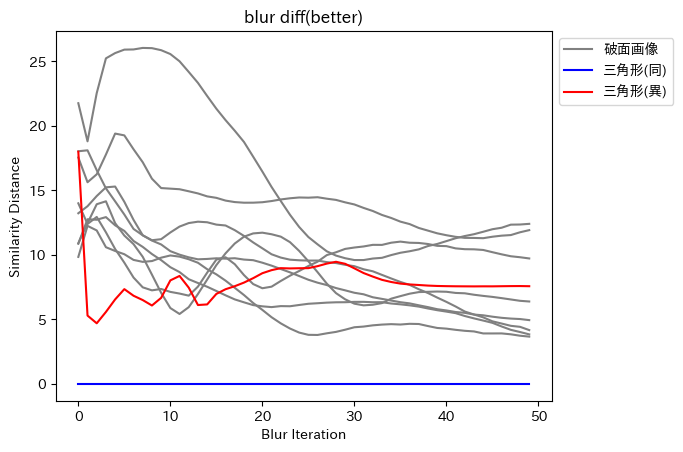

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


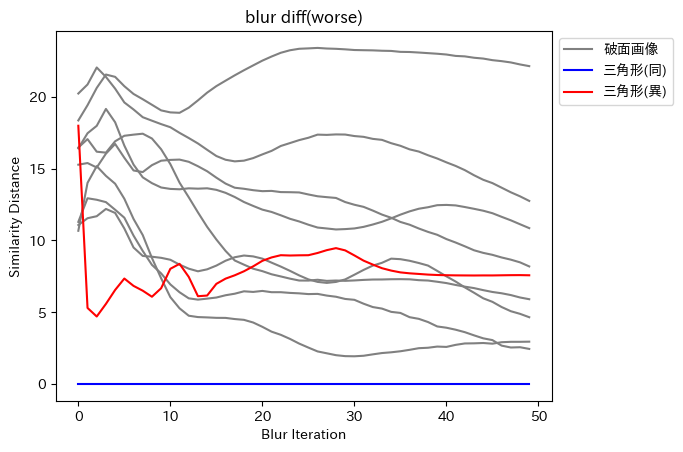

In [ ]:
import japanize_matplotlib
legend_list = ['破面画像', '三角形(同)', '三角形(異)']
handle_list_better = []
handle_list_worse = []

p = plt.plot(better_dist_ar[:8].T, color='gray')
handle_list_better.append(p[0])
p = plt.plot(same_triangle_dist_ar.T, color='blue')
handle_list_better.append(p[0])
p = plt.plot(different_triangle_dist_ar.T, color='red')
handle_list_better.append(p[0])
plt.xlabel('Blur Iteration')
plt.ylabel('Similarity Distance')
plt.legend(handles = handle_list_better, labels = legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('blur diff(better)')
plt.savefig('../Figure/symmetry_better.eps')
plt.show()

p = plt.plot(worse_dist_ar[:8].T, color='gray')
handle_list_worse.append(p[0])
p = plt.plot(same_triangle_dist_ar.T, color='blue')
handle_list_worse.append(p[0])
p = plt.plot(different_triangle_dist_ar.T, color='red')
handle_list_worse.append(p[0])
plt.xlabel('Blur Iteration')
plt.ylabel('Similarity Distance')
plt.legend(handles = handle_list_worse, labels = legend_list, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('blur diff(worse)')
plt.savefig('../Figure/symmetry_worse.eps')
plt.show()




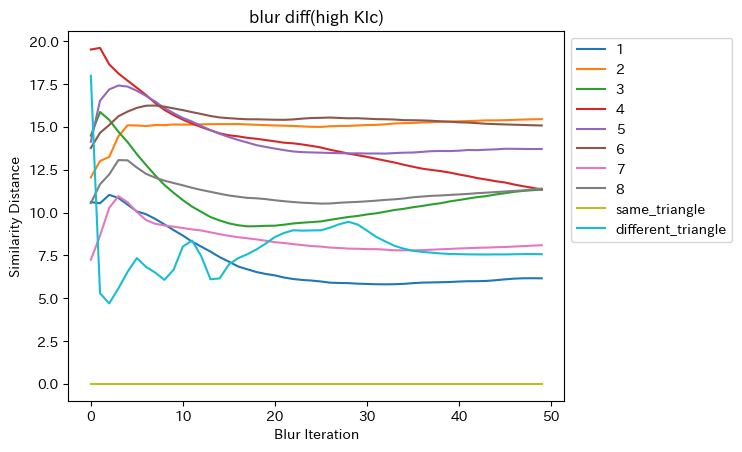

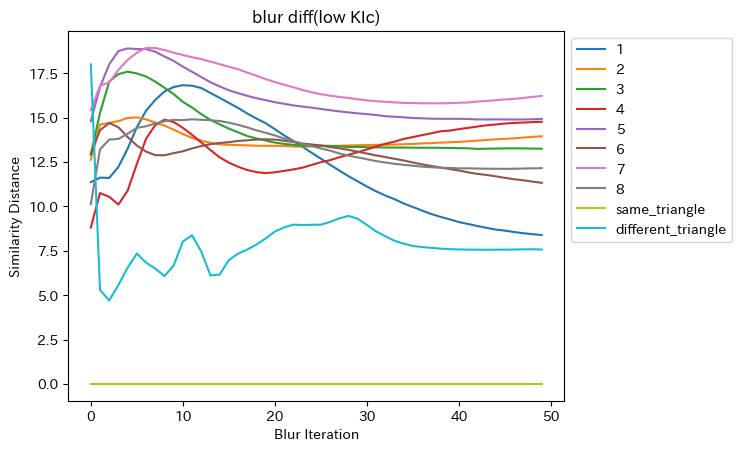

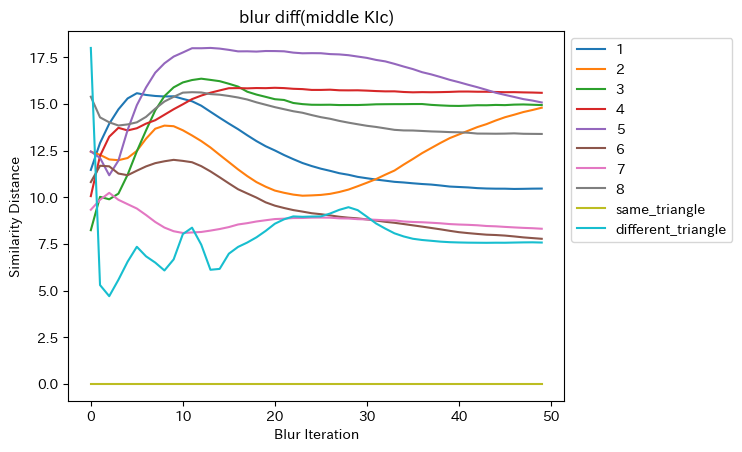

In [ ]:
combined_high_dist_ar = np.concatenate((high_dist_ar[:8], same_triangle_dist_ar, different_triangle_dist_ar), axis=0)
plt.plot(combined_high_dist_ar.T)
plt.xlabel('Blur Iteration')
plt.ylabel('Similarity Distance')
plt.legend([f'{i}' for i in range(1, len(high_dist_ar[:8])+1)] + ['same_triangle', 'different_triangle'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('blur diff(high KIc)')
plt.savefig('./data/symmetry_high.png')
plt.show()

combined_low_dist_ar = np.concatenate((low_dist_ar[:8], same_triangle_dist_ar, different_triangle_dist_ar), axis=0)
plt.plot(combined_low_dist_ar.T)
plt.xlabel('Blur Iteration')
plt.ylabel('Similarity Distance')
plt.legend([f'{i}' for i in range(1, len(low_dist_ar[:8])+1)] + ['same_triangle', 'different_triangle'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('blur diff(low KIc)')
plt.savefig('./data/symmetry_low.png')
plt.show()

combined_middle_dist_ar = np.concatenate((middle_dist_ar[:8], same_triangle_dist_ar, different_triangle_dist_ar), axis=0)
plt.plot(combined_middle_dist_ar.T)
plt.xlabel('Blur Iteration')
plt.ylabel('Similarity Distance')
plt.legend([f'{i}' for i in range(1, len(middle_dist_ar[:8])+1)] + ['same_triangle', 'different_triangle'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('blur diff(middle KIc)')
plt.savefig('./data/symmetry_middle.png')
plt.show()